# **IMPORTS**

In [ ]:
# ---- Imports ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# try XGBoost, fallback to sklearn GradientBoosting
try:
    from xgboost import XGBClassifier
    xgb_available = True
except Exception:
    from sklearn.ensemble import GradientBoostingClassifier
    xgb_available = False

# Try SMOTE from imblearn with fallback
use_smote = True
try:
    from imblearn.over_sampling import SMOTE
except Exception:
    print("imblearn not installed — will use simple upsampling fallback.")
    use_smote = False

from sklearn.inspection import permutation_importance

# **READ AND ANALYSIS DATA**

In [ ]:
df =pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


# **Data Cleaning**

In [ ]:
print(df.isnull().sum())
print(f"No of Duplicates : {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
constant_columns = ['EmployeeCount', 'Over18', 'StandardHours']
print(f"{df[constant_columns].value_counts()}")

EmployeeCount  Over18  StandardHours
1              Y       80               1470
Name: count, dtype: int64


In [ ]:
df.drop(constant_columns, axis=1, inplace=True)
df.drop('EmployeeNumber', axis=1, inplace=True)

In [ ]:
df.shape

(1470, 31)

# **EDA**

In [ ]:
col = ['Attrition', 'BusinessTravel', 'Department',
       'Education','EnvironmentSatisfaction',
       'Gender','JobInvolvement', 'JobLevel',
       'JobSatisfaction','MaritalStatus', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance']

In [ ]:
col2 = ['Age','DailyRate','DistanceFromHome',
        'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
        'TotalWorkingYears','TotalWorkingYears','YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

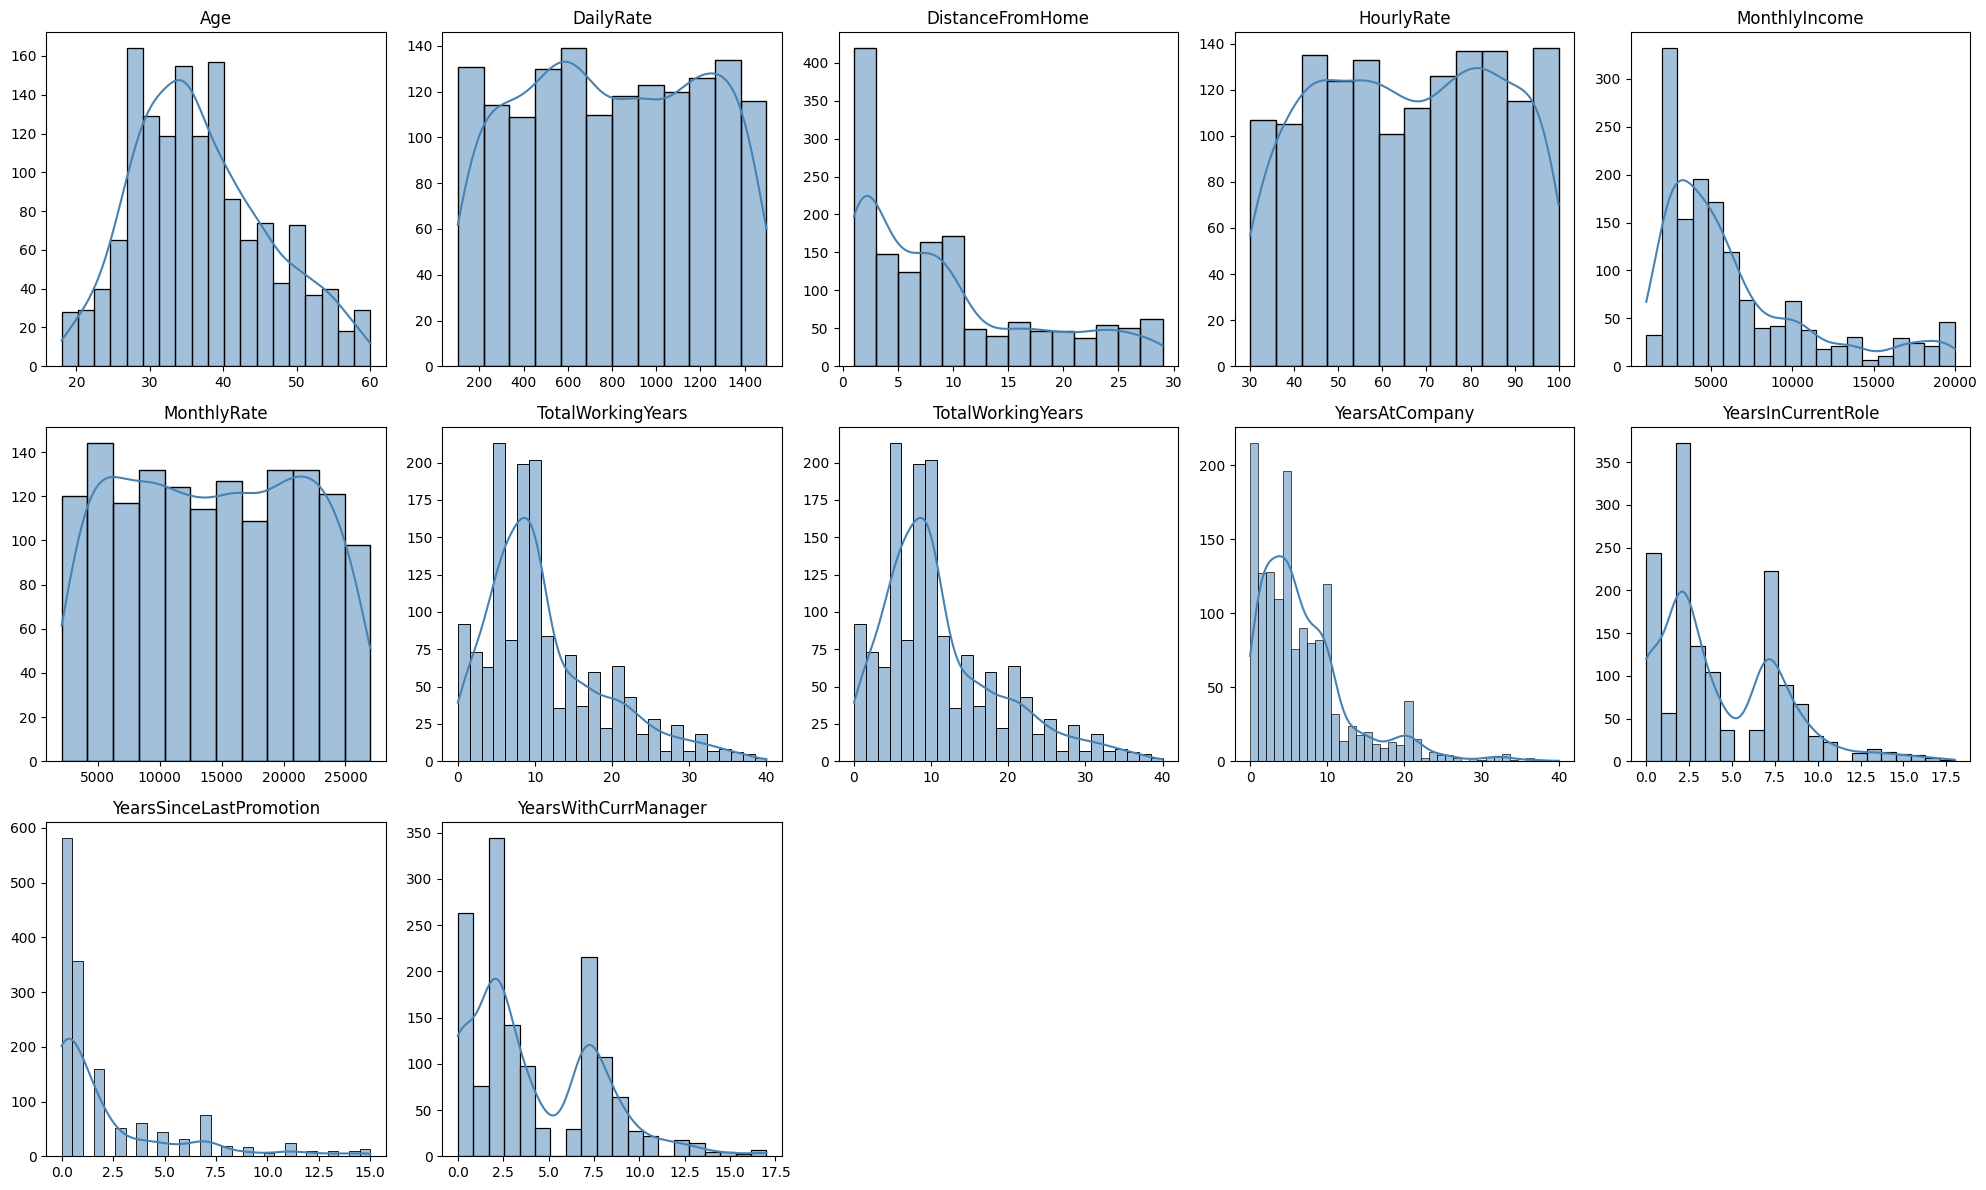

In [ ]:
# Define number of columns and rows in grid
n_cols = 5
n_rows = (len(col2) + n_cols - 1) // n_cols  # automatic row count

# Set figure size
plt.figure(figsize=(20, n_rows * 4))

for i, column in enumerate(col2, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[column], kde=True, color='steelblue')
    plt.title(column, fontsize=12)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


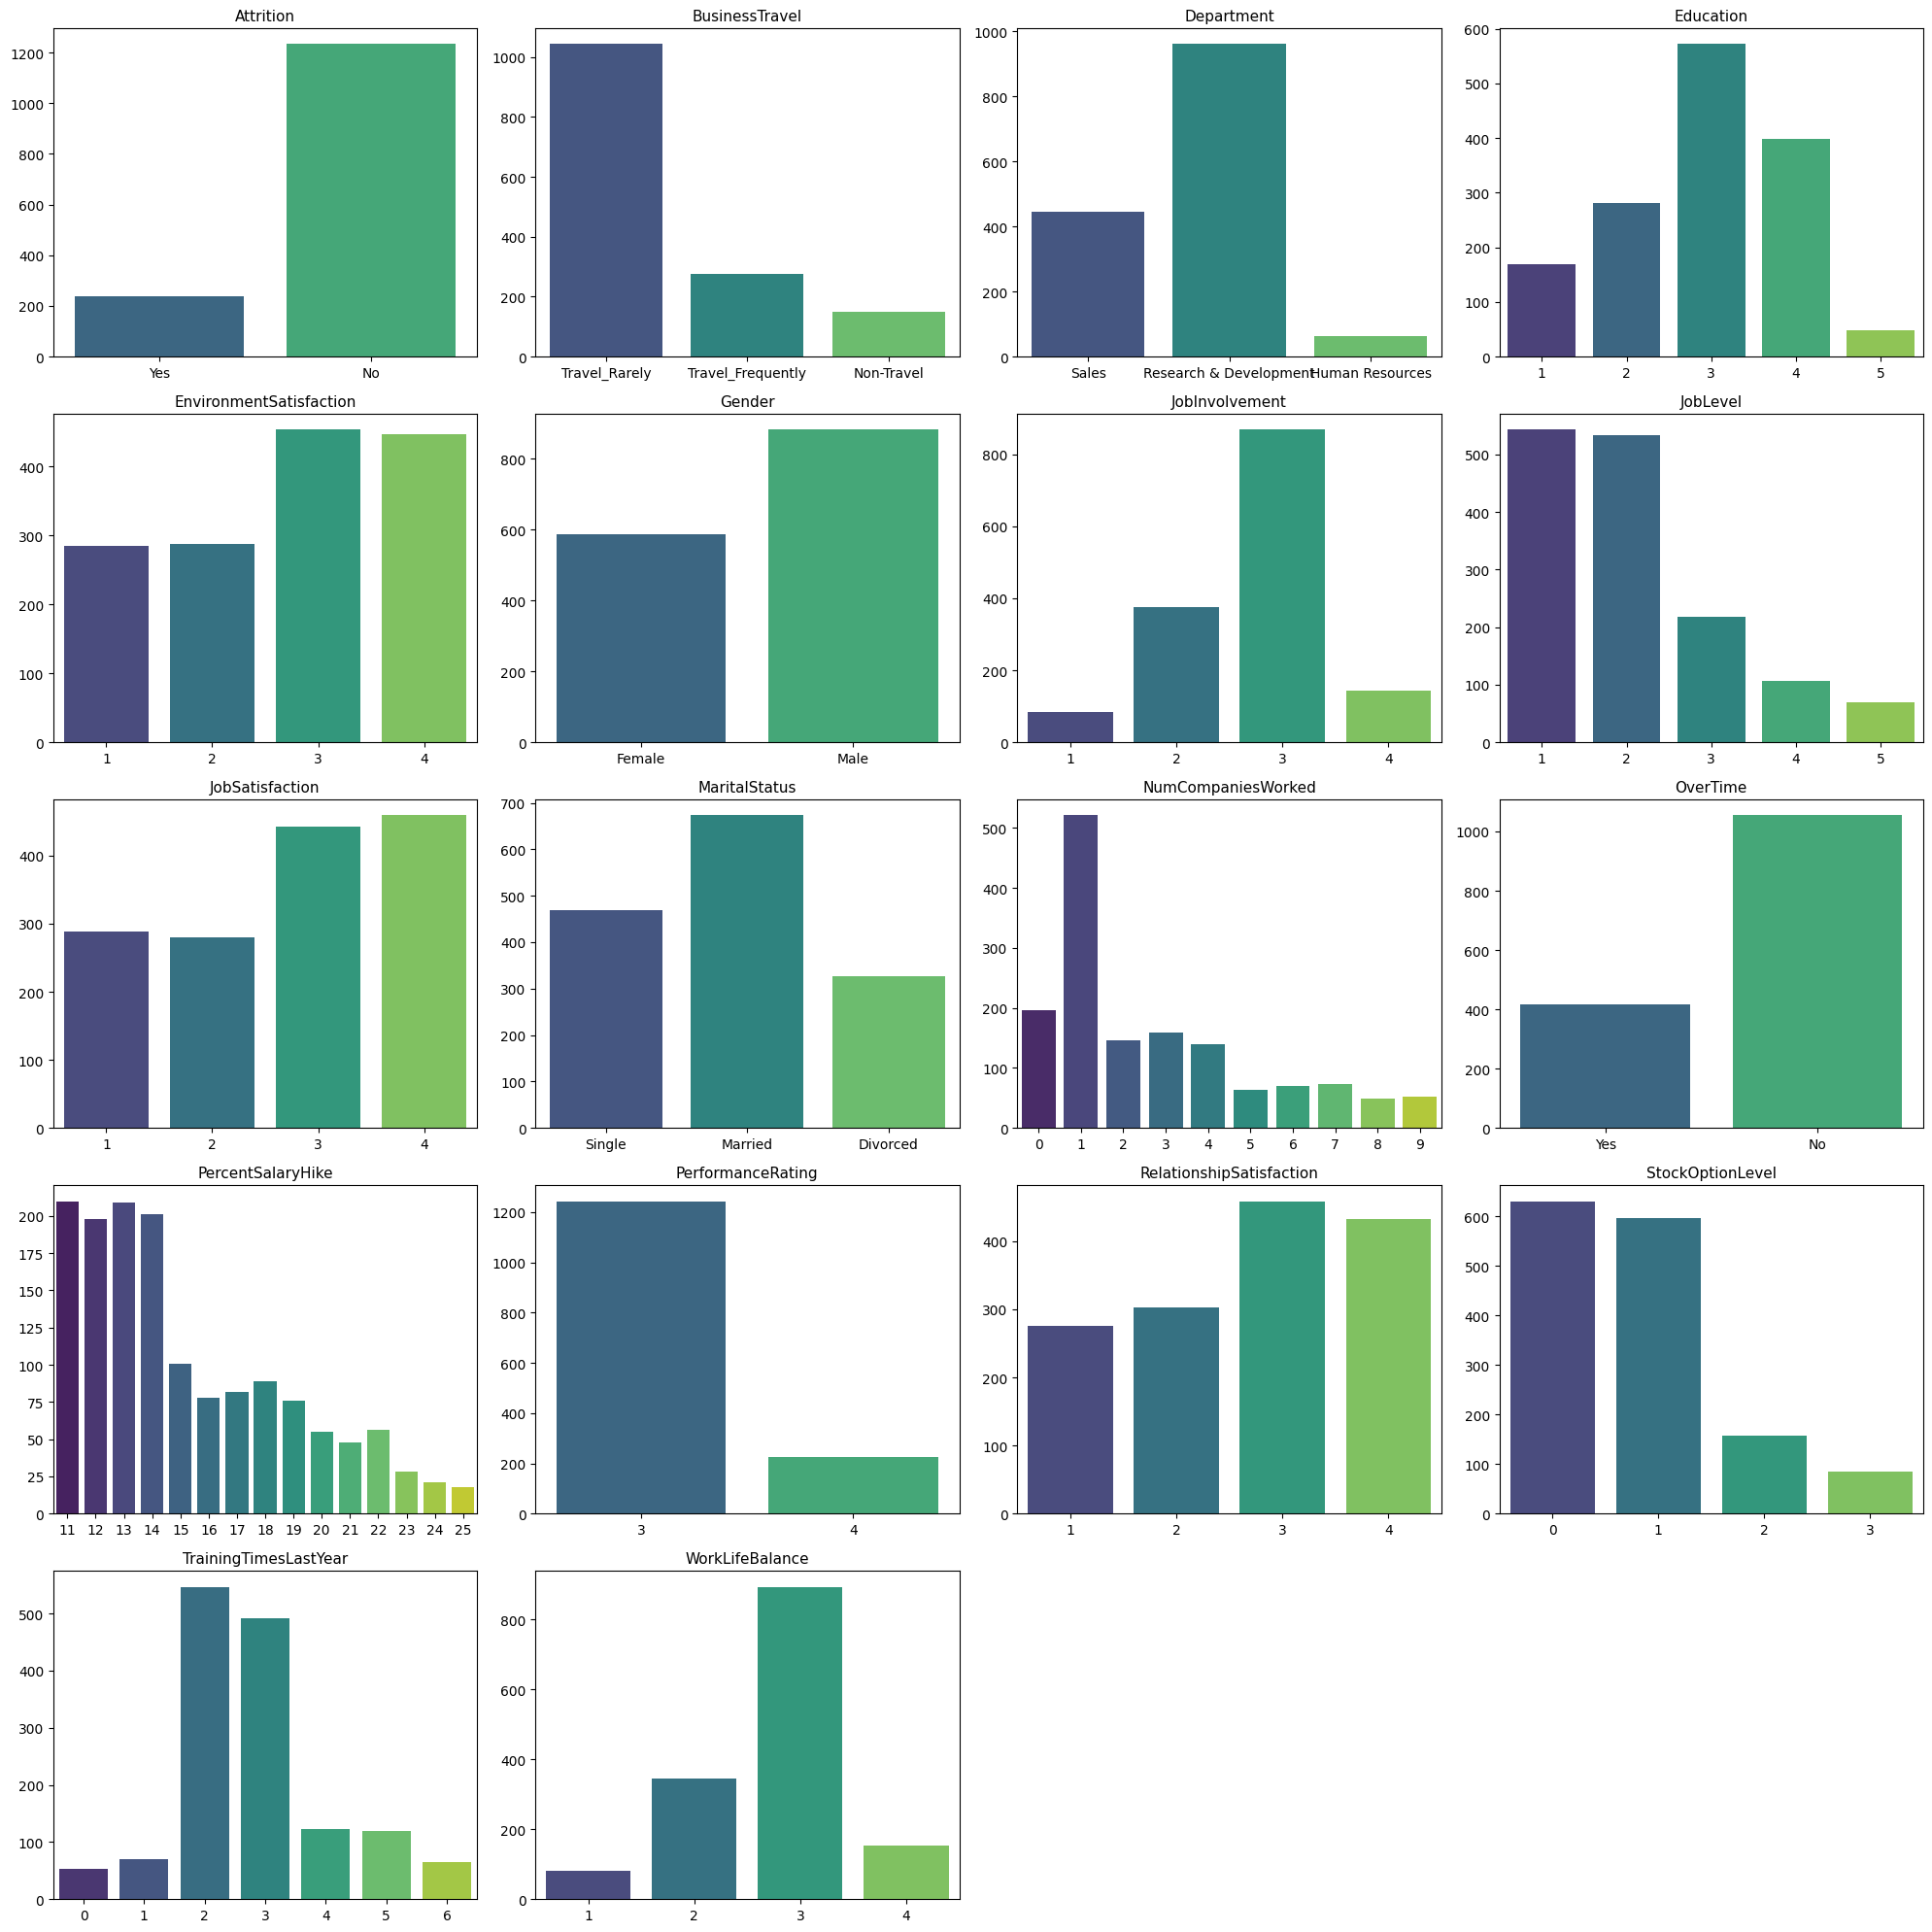

In [ ]:
# Define grid layout
n_cols = 4
n_rows = (len(col) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 4))

for i, column in enumerate(col, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=column, data=df, palette="viridis")
    plt.title(column, fontsize=11)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

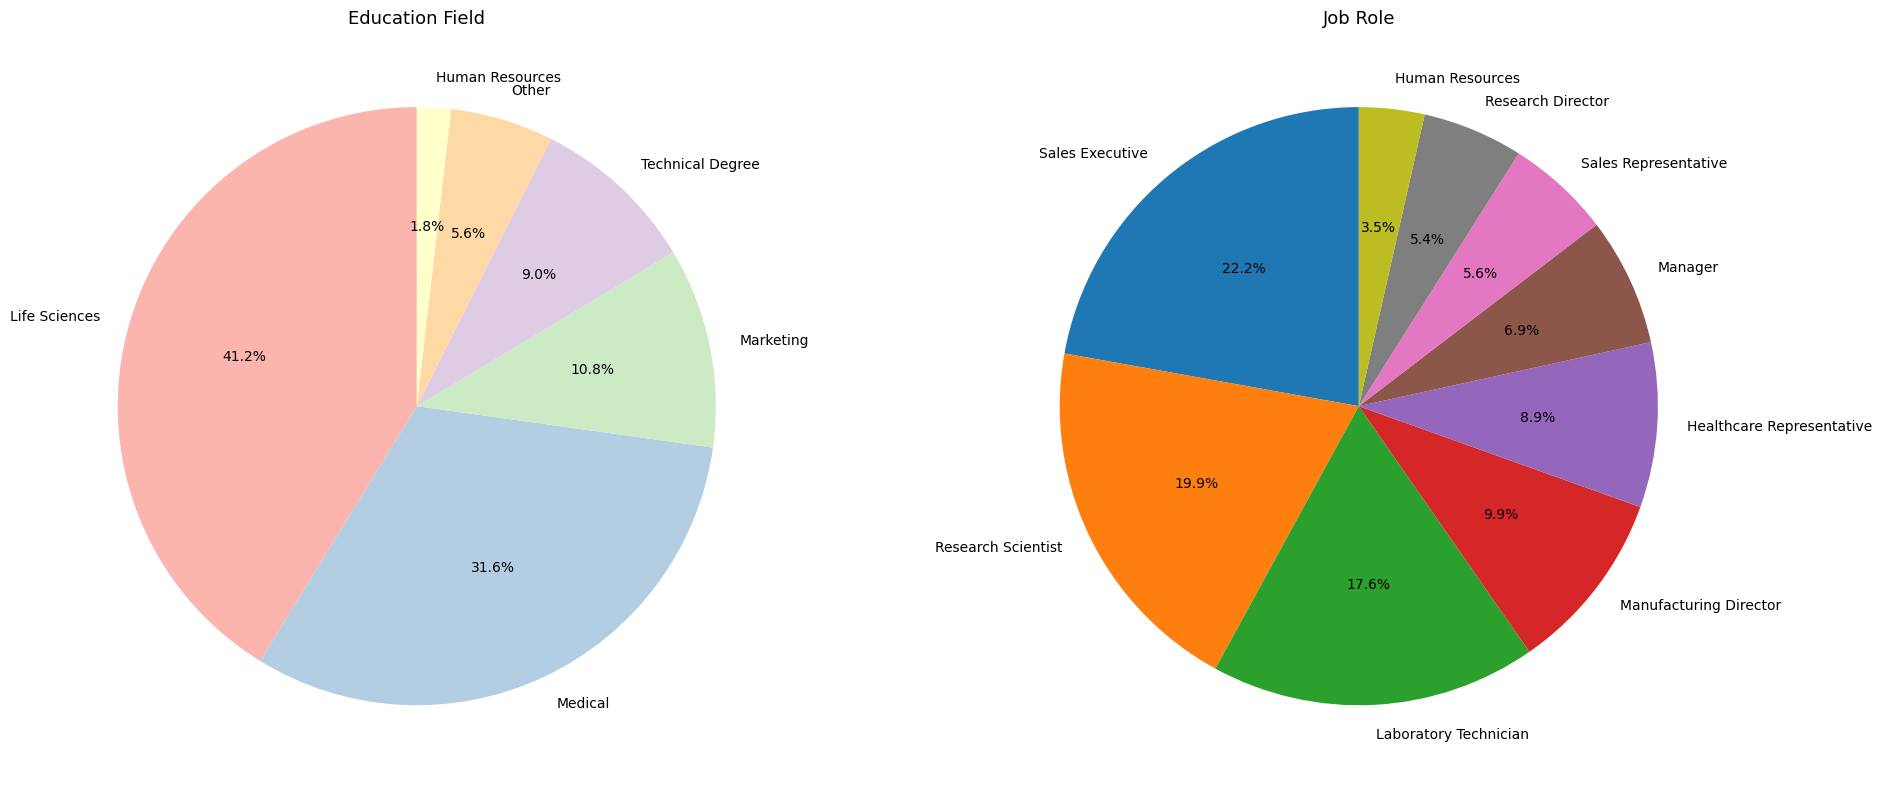

In [ ]:
# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Pie Chart 1 — EducationField (pastel colors)
axes[0].pie(df['EducationField'].value_counts(),
            labels=df['EducationField'].value_counts().index,
            autopct='%1.1f%%',
            colors=plt.cm.Pastel1.colors, startangle=90)
axes[0].set_title('Education Field', fontsize=13)

# Pie Chart 2 — JobRole (deep colors)
axes[1].pie(df['JobRole'].value_counts(),
            labels=df['JobRole'].value_counts().index,
            autopct='%1.1f%%',
            colors=plt.cm.tab10.colors, startangle=90)
axes[1].set_title('Job Role', fontsize=13)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
# To make plots look better
sns.set(style="whitegrid", palette="Set2")

# Target variable
target = 'Attrition'

# Split columns by type
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()

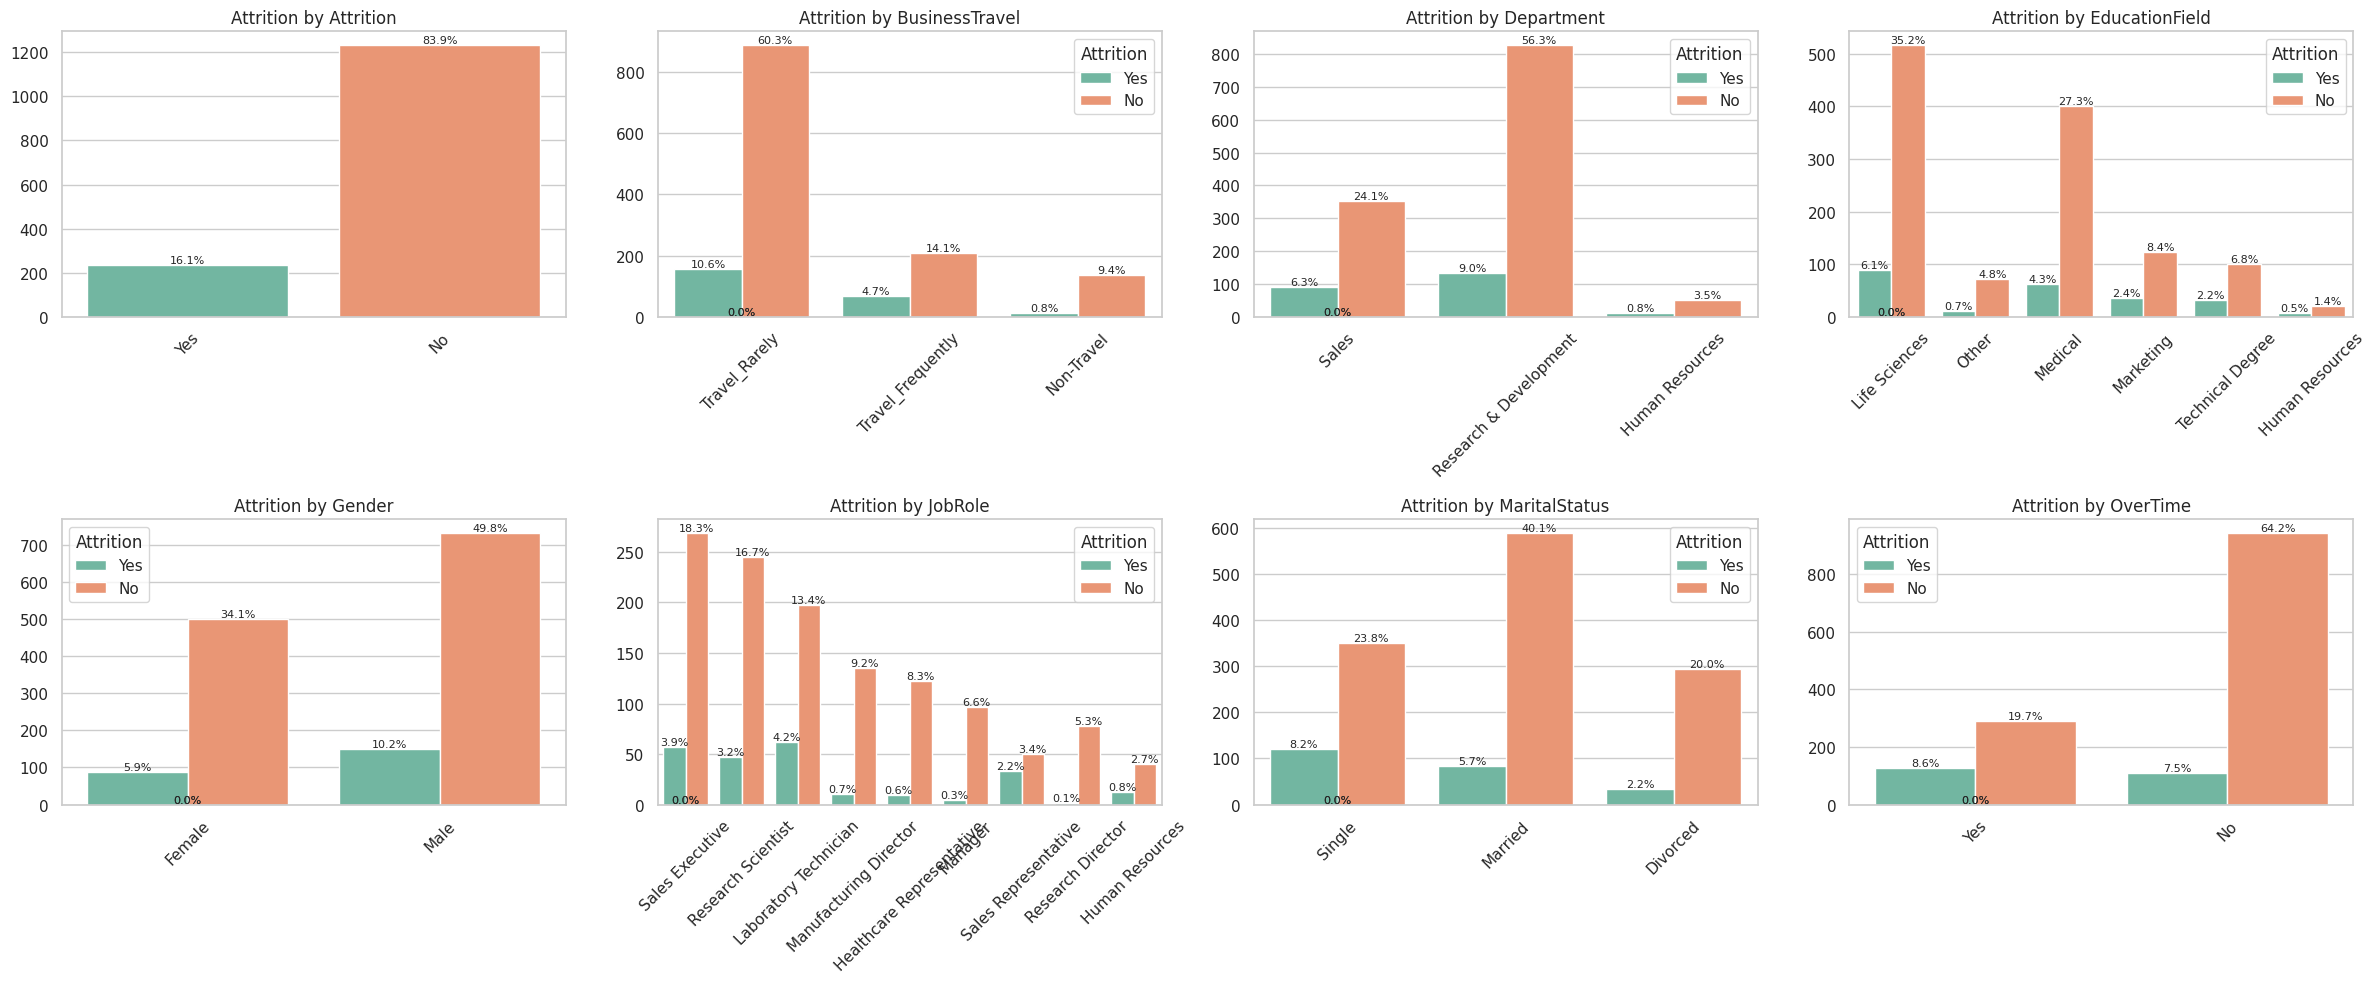

In [ ]:
# Set up grid layout
n_cols = 4
n_rows = (len(cat_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, n_rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    sns.countplot(x=col, hue='Attrition', data=df, palette='Set2', ax=ax)
    ax.set_title(f'Attrition by {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

    # Add % labels
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height / total:.1f}%'
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

# Hide unused axes if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

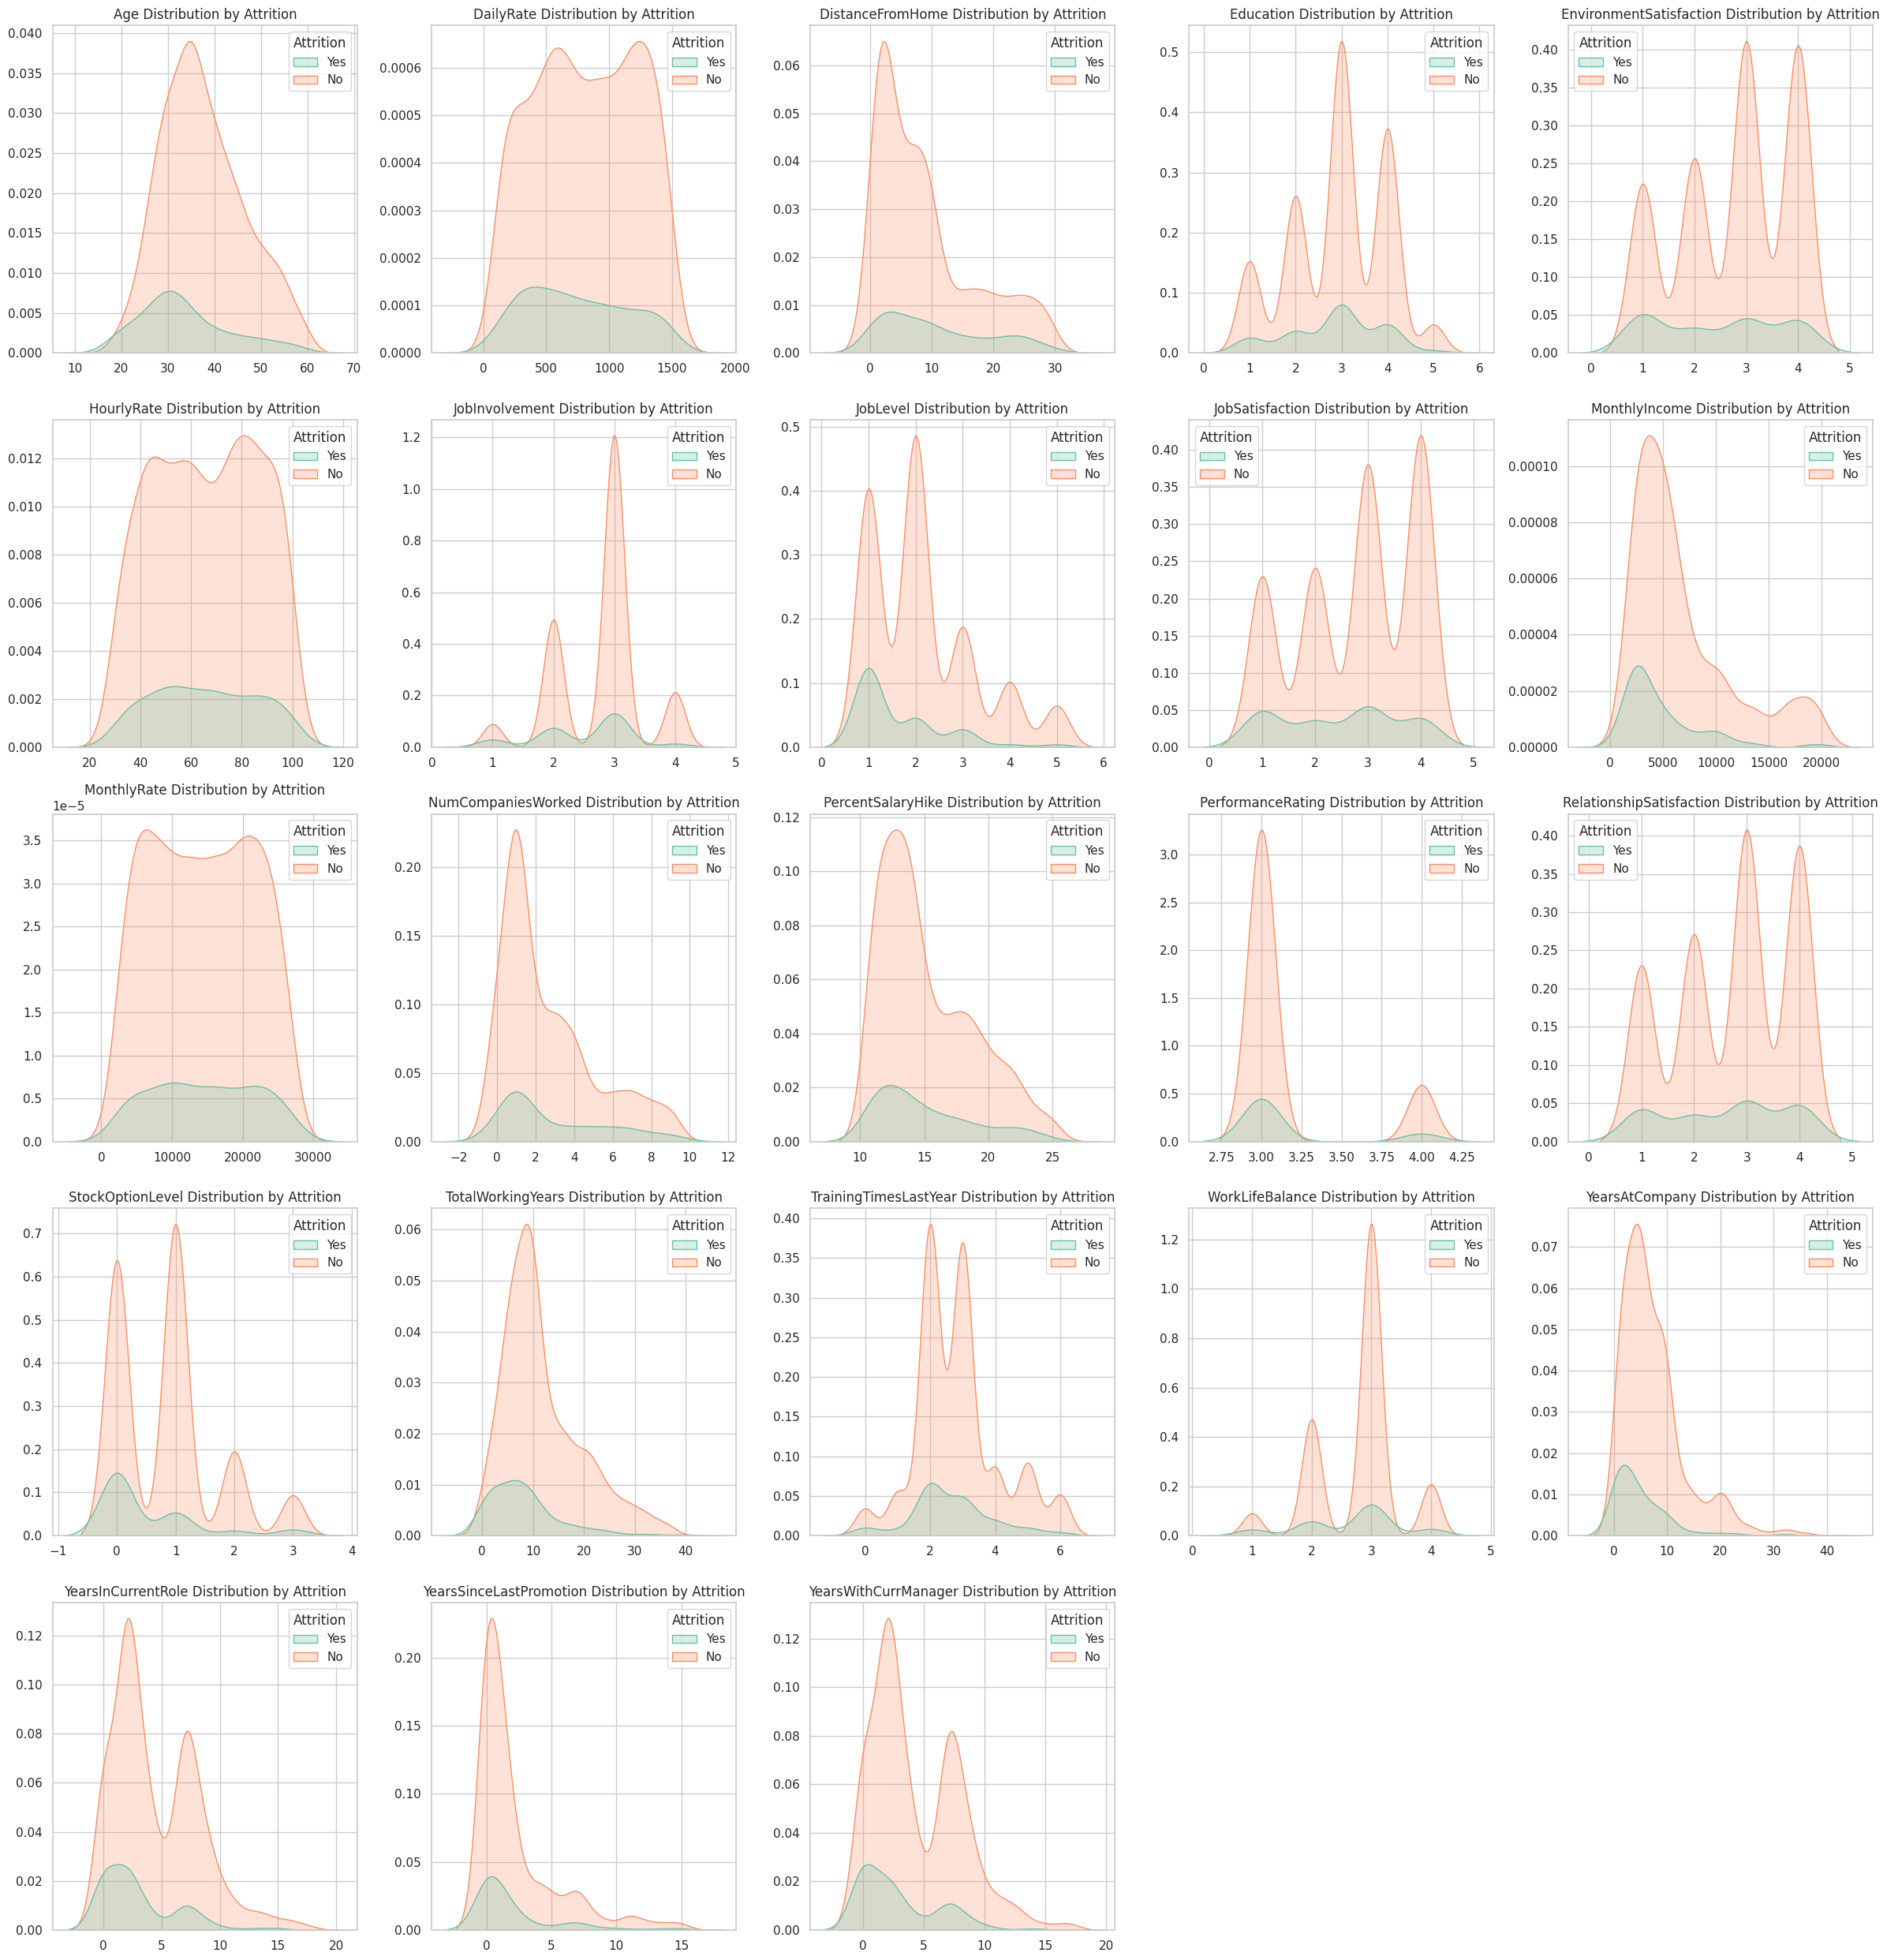

In [ ]:
n_cols = 5
n_rows = (len(num_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.kdeplot(data=df, x=col, hue='Attrition', fill=True, ax=ax)
    ax.set_title(f'{col} Distribution by Attrition', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
attrition_means = df.groupby('Attrition')[num_cols].mean().T
attrition_means['Difference'] = attrition_means['Yes'] - attrition_means['No']
attrition_means.sort_values('Difference', ascending=False)


Attrition,No,Yes,Difference
MonthlyRate,14265.779400,14559.308017,293.528617
DistanceFromHome,8.915653,10.632911,1.717259
NumCompaniesWorked,2.645580,2.940928,0.295348
PerformanceRating,3.153285,3.156118,0.002833
Education,2.927007,2.839662,-0.087345
WorkLifeBalance,2.781022,2.658228,-0.122794
PercentSalaryHike,15.231144,15.097046,-0.134097
RelationshipSatisfaction,2.733982,2.599156,-0.134826
TrainingTimesLastYear,2.832928,2.624473,-0.208455
JobInvolvement,2.770479,2.518987,-0.251491


In [ ]:
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

corr = df_encoded.corr()['Attrition'].sort_values(ascending=False)
print(corr)


Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

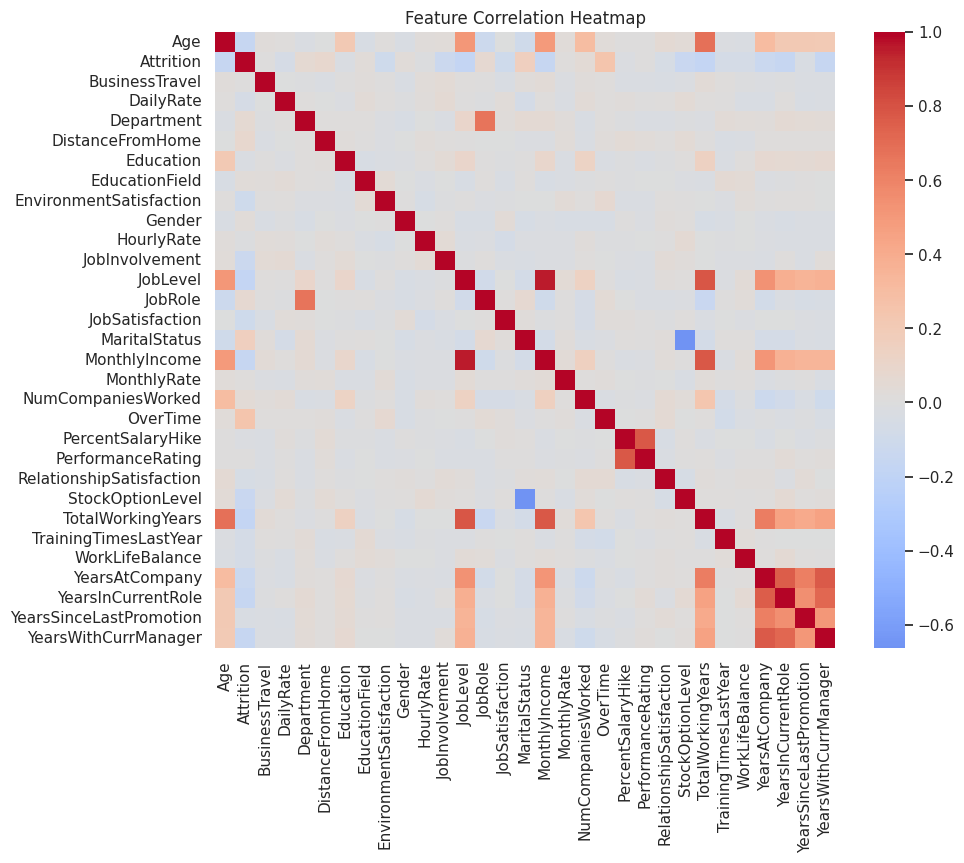

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


# **Model Building**

In [ ]:
# Encode all categorical columns
df_model = df.copy()
le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])

X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

y = le.fit_transform(y)

print("Features shape:", X.shape)
print("Target distribution before balancing:\n", df_model['Attrition'].value_counts())

# ---- Train-test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# ---- Balance training set (only) ----
if use_smote:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    print("Used SMOTE. After resampling:", np.bincount(y_res))
else:
    # simple upsample minority class in training set
    train = pd.concat([X_train, y_train], axis=1)
    majority = train[train['Attrition']==0]
    minority = train[train['Attrition']==1]
    minority_upsampled = resample(minority,
                                 replace=True,
                                 n_samples=len(majority),
                                 random_state=42)
    train_upsampled = pd.concat([majority, minority_upsampled])
    X_res = train_upsampled.drop(columns='Attrition')
    y_res = train_upsampled['Attrition']
    print("Used simple upsampling. After resampling:\n", y_res.value_counts())

# ---- Models to train ----
models = {
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    'LogisticRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=500, random_state=42))
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', KNeighborsClassifier(n_neighbors=7))
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC(probability=True, random_state=42))
    ]),
    'NaiveBayes': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', GaussianNB())
    ])
}

# Add XGBoost or GradientBoosting
if xgb_available:
    models['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
else:
    models['GradBoost'] = GradientBoostingClassifier(random_state=42)

Features shape: (1470, 30)
Target distribution before balancing:
 Attrition
0    1233
1     237
Name: count, dtype: int64
Used SMOTE. After resampling: [986 986]


# **Model Training**

In [ ]:
# ---- Train & evaluate all models ----
results = {}
for name, model in models.items():
    print(f"\nTraining {name} ...")
    # if pipeline, fit directly
    model.fit(X_res, y_res)
    y_train_pred = model.predict(X_res)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_res, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f"{name} — Train Accuracy: {train_acc:.4f} — Test Accuracy: {test_acc:.4f}")
    results[name] = {
        'model': model,
        'train_acc': train_acc,
        'test_acc': test_acc
    }

# Summary table
res_df = pd.DataFrame({
    model: {'train_acc': results[model]['train_acc'], 'test_acc': results[model]['test_acc']}
    for model in results
}).T.sort_values('test_acc', ascending=False)
print("\nModel performance (sorted by test accuracy):\n", res_df)


Training RandomForest ...
RandomForest — Train Accuracy: 1.0000 — Test Accuracy: 0.7993

Training LogisticRegression ...
LogisticRegression — Train Accuracy: 0.8484 — Test Accuracy: 0.7993

Training KNN ...
KNN — Train Accuracy: 0.8808 — Test Accuracy: 0.6259

Training SVM ...
SVM — Train Accuracy: 0.9574 — Test Accuracy: 0.8401

Training NaiveBayes ...
NaiveBayes — Train Accuracy: 0.7480 — Test Accuracy: 0.6122

Training XGBoost ...
XGBoost — Train Accuracy: 1.0000 — Test Accuracy: 0.8265

Model performance (sorted by test accuracy):
                     train_acc  test_acc
SVM                  0.957404  0.840136
XGBoost              1.000000  0.826531
LogisticRegression   0.848377  0.799320
RandomForest         1.000000  0.799320
KNN                  0.880832  0.625850
NaiveBayes           0.747972  0.612245


# **Best Model**


Best model: SVM (Test Acc = 0.8401)

Classification report for best model:

              precision    recall  f1-score   support

          No       0.90      0.91      0.91       247
         Yes       0.50      0.47      0.48        47

    accuracy                           0.84       294
   macro avg       0.70      0.69      0.69       294
weighted avg       0.84      0.84      0.84       294

Confusion Matrix:
 [[225  22]
 [ 25  22]]


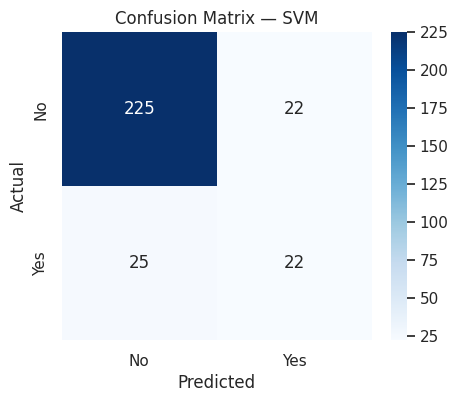

In [ ]:
# ---- Choose best model by test accuracy ----
best_name = res_df.index[0]
best_model = results[best_name]['model']
print(f"\nBest model: {best_name} (Test Acc = {res_df.loc[best_name,'test_acc']:.4f})")

# ---- Detailed evaluation for best model ----
y_pred_best = best_model.predict(X_test)
print("\nClassification report for best model:\n")
print(classification_report(y_test, y_pred_best, target_names=['No','Yes']))

cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix — {best_name}')
plt.show()

# **Top Features**


Computing permutation importance (may take some time)...

Top 10 features (permutation importance):
 OverTime                    0.032880
JobSatisfaction             0.028798
StockOptionLevel            0.025850
MaritalStatus               0.013832
HourlyRate                  0.012472
Age                         0.011791
EnvironmentSatisfaction     0.011111
TrainingTimesLastYear       0.010204
RelationshipSatisfaction    0.009524
JobRole                     0.008390
dtype: float64


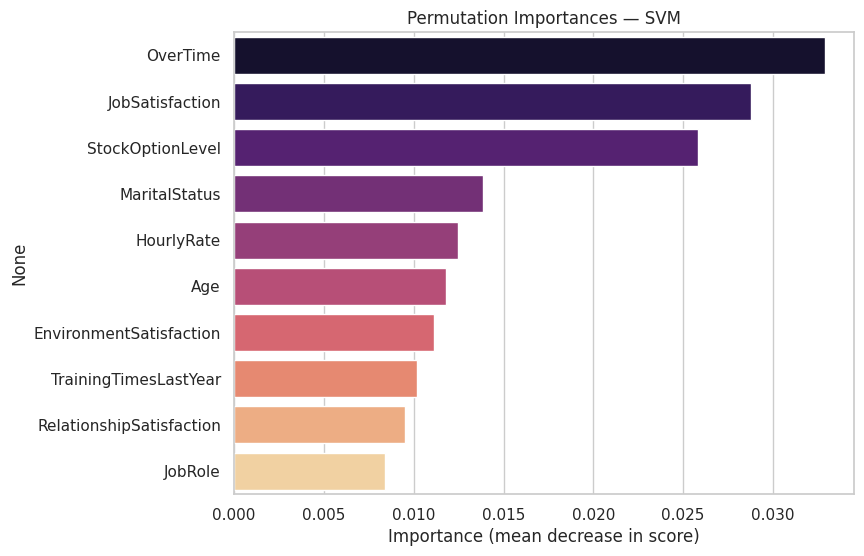


Done. Summary:
                    train_acc  test_acc
SVM                  0.957404  0.840136
XGBoost              1.000000  0.826531
LogisticRegression   0.848377  0.799320
RandomForest         1.000000  0.799320
KNN                  0.880832  0.625850
NaiveBayes           0.747972  0.612245

Best model: SVM


In [ ]:
# ---- Top 10 features for best model ----
feature_names = X.columns

# If model has feature_importances_ attribute (tree models)
if hasattr(best_model, 'feature_importances_'):
    fi = best_model.feature_importances_
    fi_series = pd.Series(fi, index=feature_names).sort_values(ascending=False)
    top10 = fi_series.head(10)
    print("\nTop 10 features (feature_importances_):\n", top10)
    # plot
    plt.figure(figsize=(8,6))
    sns.barplot(x=top10.values, y=top10.index, palette='viridis')
    plt.title(f'Top 10 Feature Importances — {best_name}')
    plt.xlabel('Importance')
    plt.show()

# If model is linear (Logistic Regression) and inside pipeline
elif best_name == 'LogisticRegression':
    # get coefficients (clf inside pipeline)
    coef = best_model.named_steps['clf'].coef_[0]
    coef_series = pd.Series(coef, index=feature_names).sort_values(key=abs, ascending=False).head(10)
    print("\nTop 10 features (by absolute coef) — LogisticRegression:\n", coef_series)
    plt.figure(figsize=(8,6))
    sns.barplot(x=coef_series.values, y=coef_series.index)
    plt.title('Top 10 Coefficients — LogisticRegression')
    plt.xlabel('Coefficient value')
    plt.show()

else:
    # Fallback: permutation importance (model-agnostic)
    print("\nComputing permutation importance (may take some time)...")
    # use test set for permutation importance
    r = permutation_importance(best_model, X_test, y_test, n_repeats=15, random_state=42, n_jobs=-1)
    perm_series = pd.Series(r.importances_mean, index=feature_names).sort_values(ascending=False).head(10)
    print("\nTop 10 features (permutation importance):\n", perm_series)
    plt.figure(figsize=(8,6))
    sns.barplot(x=perm_series.values, y=perm_series.index, palette='magma')
    plt.title(f'Permutation Importances — {best_name}')
    plt.xlabel('Importance (mean decrease in score)')
    plt.show()

# ---- Print final notes ----
print("\nDone. Summary:")
print(res_df)
print(f"\nBest model: {best_name}")